In [1]:
import requests
from pandas.io.json import json_normalize
import csv
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
url_list = ["1_1",
            "1_2",
            "1_3",
            "1_4",
            "1_8",
            "1_26",
            "1_49"
           ]

feature_list= ["102",#total_points
        ]

feature_name = ["total_points", 
                "successful_raids",
                "raid_points",
                "successful_tackles",
                "tackle_points"             ]
url = "https://www.prokabaddi.com/sifeeds/kabaddi/static/json/{}_{}_stats.json"



#.format("1_49_96")



In [4]:
def create_df(feature_name,feature_list):
    for i in range(0,len(url_list)):
        temp = pd.DataFrame()
        url_s = url.format(url_list[i],feature_list)
        jsonData = requests.get(url_s).json()
        temp = json_normalize(jsonData['data'])
        temp.rename(columns = {'value':feature_name}, inplace = True)
        temp.rename(columns = {'rank':feature_name+"_rank"}, inplace = True)
        temp.rename(columns = {'match_played':feature_name+"_match_played"}, inplace = True)
        temp['season'] = i+1
        if i==0:
            final =temp
        else:
            final=final.append(temp)
    return final

In [5]:
total_points_df = create_df(feature_name[0],feature_list[0])

D:\Anaconda\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [6]:
total_points_df['player_id'].unique()

array([  29,   81,  143,   26,   58,   69,  118,  142,   52,  124,   92,
         75,   88,   86,   41,  111,   94,  105,  146,   66,   12,   55,
         42,  141,  107,   51,   85,  156,   70,   96,   71,  150,  160,
         73,  147,   56,   67,   28,  157,  162,  168,  108,   98,   20,
         45,  152,  161,  163,  174,   79,  123,  165,  166,   84,   89,
         72,   44,   54,   16,   46,   76,  167,  159,  164,  169,   32,
         10,  170,  173,    4,   36,   53,   19,   61,   38,   21,   13,
         80,   68,   97,  151,  155,  158,  154,  113,   14,   23,   77,
         87,  144,  145,    5,    9,   11,   17,  148,  248,  217,  252,
        211,  190,  251,  240,  109,   34,  194,  171,  212,  207,  204,
        182,  243,  242,  238,  264,  245,  180,  195,  185,  233,  231,
        181,  261,  259,  191,  232,  235,  222,  268,  197,  179,  234,
        267,  246,  244,  249,  219,  178,  184,  202,  208,  260,  236,
        223,  250,  225,  241,  205,  206,  221,  2

In [7]:
player_lst = [  29,   81,  143,   26,   58,   69,  142,   52,  124,   92, 75,   88,   86,   41,  111,   94,  105,  146,   66,   12,
         42,  141,  107,   51,   85,  156,   70,   96,   71,  150,  160, 73,  67,   28,  157,  162, 20,
         152,  161,  163,  174,   123,  165,  84,  72,   44,   54,   16,   46,   167, 164, 
         170,  173,    36,   53,   61, 21,   13,  97,  155,  158,  14,  
        87,  9,   11, 217,  252, 211,  190,  251,  240,  109,   34,  194, 212,  207,  204,
       242, 264,  245,  195,  185,  233,  231, 261,  259,  191,  232, 268,  197,  179,  234,
       249,  219, 202, 250,  200,
        201,  326,  320,  119,  318,  322,  290, 311, 272,  275,  215,  172,  288,  293,  106,313,
        299,   324, 388,  389,  300,  387, 386,  360,  363,  376,
        358,  347,  357,  366,  370,  371,  390,  301,  368,757,  791,  579,  489,  745,  733,  769,  795,
        764,  567,  725,  724,  361,  686,  718,  762,  576,  611,  522, 722,  482,  773,  734,  372,  648,  728,  771,  796,  365,  536,
        613,  665,  667,  696,  784,  772,  676,  837,  637,  121,  101, 710,  735,  736,  661,  689,  694,  732,  605,  218,  578,  738,
        768,  741,  751,  730,  746,  776,  790,  792,  640,  647,  660, 690,  712,  519,  392,  266,  279,  726,  774,  765,  384,  513,
        705,  580, 2026, 2296,  763, 2357, 2475, 2028, 2023,  778, 2462, 794, 2476,  621, 2463, 2316, 2481, 2307, 2298, 2274, 2470,  786,
        274, 2479,  731,  644, 2278, 2290, 2291, 2325, 2306, 2266, 2257, 2336, 2315, 2020,  608, 2314, 2328, 2353, 2024,  599,  214, 2021,
       2262, 2302, 2471, 2335, 2313,  793,  698,  708,   74, 2318, 2351, 2482, 2661,  484, 2508, 2488, 2330, 2286, 2670,  115,  571, 2485,
        684, 2657, 2492, 2503, 2498, 2486, 2502, 2672, 2512, 2667, 2682, 2494, 2496, 2659, 2660, 2322,  481, 2321, 2662, 2506, 2514, 2504,
       2507, 2665, 2666, 2478, 2644, 2683, 2669, 2474, 2041,  509, 2025, 2489, 2501, 2376, 2671, 2515]

In [8]:
def player_data():
    try:
        for i in range(0,len(player_lst)):
            temp = pd.DataFrame()
            url_s = url.format(player_lst[i],'player')
            jsonData = requests.get(url_s).json()
            temp = json_normalize(jsonData['over_all_stats'])
            if i==0:
                final =temp
            else:
                final=final.append(temp)
        return final
    except:
        pass

In [9]:
url = "https://www.prokabaddi.com/sifeeds/kabaddi/static/json/{}_{}.json"
player_stats=player_data()

In [10]:
player_stats.head()

,career_best_points,defence_touch_points,defending_bonus_points,empty_raid,green_cards,high_5s,location,match_played,name,not_out_percentage,player_id,player_team,player_team_arr,point,points_defence_offence,points_per_match_raid_tackle,raid_bonus_points,raid_map_locations,raid_points_per_match,raid_touch_points,raids,red_cards,role,series_id,series_name,success_raid_percent,success_raids,success_tackles,success_tackles_per_match,super_10s,super_raids,super_tackles,tackle_bonus_points,tackle_success_rate,tackles,total_capture_points,total_defending_points,total_raid_points,total_tackle_points,unsuccesful_tackles,unsuccess_raids,yellow_cards
0,16,14,2,86,3,0,,16,Anup Kumar,81.96,29,0,"[{'team_id': 5, 'team_name': 'U Mumba', 'team_...",169,169,10.56,40,,9.68,115,255,0,,1,"Pro Kabaddi League Season 1, 2014",60.78,123,12,0.75,10,8,2,,40.00,35,,14,155,14,23,46,0
1,10,7,1,148,8,0,,14,Anup Kumar,85.65,29,0,"[{'team_id': 5, 'team_name': 'U Mumba', 'team_...",81,81,5.78,7,,5.28,67,244,0,,2,"Pro Kabaddi League Season 2, 2015",30.32,61,6,0.42,1,1,1,,58.33,12,,7,74,7,6,35,0
2,9,3,0,121,1,0,,13,Anup Kumar,88.03,29,0,"[{'team_id': 5, 'team_name': 'U Mumba', 'team_...",79,79,6.07,11,,5.84,65,209,0,,3,"Pro Kabaddi League Season 3, 2016",36.36,63,3,0.23,0,3,0,,33.33,9,,3,76,3,6,25,1
3,11,10,1,141,4,0,,14,Anup Kumar,87.39,29,0,"[{'team_id': 5, 'team_name': 'U Mumba', 'team_...",82,82,5.85,19,,5.14,53,230,0,,4,"Pro Kabaddi League Season 4, 2016",31.30,60,9,0.64,0,1,1,,41.66,24,,10,72,10,15,29,1
4,11,23,4,153,6,0,,21,Anup Kumar,84.34,29,0,"[{'team_id': 5, 'team_name': 'U Mumba', 'team_...",135,135,6.42,42,,5.33,70,281,0,,8,"Pro Kabaddi League Season 5, 2017",39.85,84,19,0.90,2,2,4,,38.33,60,,23,112,23,41,44,0


In [11]:
file_name = "Player_stats_info.csv"
player_stats.to_csv(file_name, sep=',',index=False)

### Task 6: Predict the player with the highest SUCCESSFUL RAID percentage. (Max Points: 05)

In [12]:
import pandas as pd
import numpy as np

In [13]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [14]:
df_player  = pd.read_csv('Player_stats_info.csv')

In [15]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 42 columns):
career_best_points              1287 non-null int64
defence_touch_points            1287 non-null int64
defending_bonus_points          1287 non-null int64
empty_raid                      1287 non-null int64
green_cards                     1287 non-null int64
high_5s                         1098 non-null float64
location                        52 non-null float64
match_played                    1287 non-null int64
name                            1287 non-null object
not_out_percentage              1287 non-null float64
player_id                       1287 non-null int64
player_team                     1287 non-null int64
player_team_arr                 1098 non-null object
point                           1287 non-null int64
points_defence_offence          1287 non-null int64
points_per_match_raid_tackle    1287 non-null float64
raid_bonus_points               1287 non-null int64
r

In [16]:
df_player.isnull().sum()/len(df_player)*100

career_best_points               0.000000
defence_touch_points             0.000000
defending_bonus_points           0.000000
empty_raid                       0.000000
green_cards                      0.000000
high_5s                         14.685315
location                        95.959596
match_played                     0.000000
name                             0.000000
not_out_percentage               0.000000
player_id                        0.000000
player_team                      0.000000
player_team_arr                 14.685315
point                            0.000000
points_defence_offence           0.000000
points_per_match_raid_tackle     0.000000
raid_bonus_points                0.000000
raid_map_locations              95.959596
raid_points_per_match            0.000000
raid_touch_points                0.000000
raids                            0.000000
red_cards                        0.000000
role                            95.959596
series_id                        0

Removing columns which has 95% values as NULL

In [17]:
# droping the column team_full_name as it contains all the values as NULL
df_player.drop(['location','raid_map_locations','role','total_capture_points','tackle_bonus_points'],axis=1,inplace=True)

In [18]:
df_player.isnull().sum()/len(df_player)*100

career_best_points               0.000000
defence_touch_points             0.000000
defending_bonus_points           0.000000
empty_raid                       0.000000
green_cards                      0.000000
high_5s                         14.685315
match_played                     0.000000
name                             0.000000
not_out_percentage               0.000000
player_id                        0.000000
player_team                      0.000000
player_team_arr                 14.685315
point                            0.000000
points_defence_offence           0.000000
points_per_match_raid_tackle     0.000000
raid_bonus_points                0.000000
raid_points_per_match            0.000000
raid_touch_points                0.000000
raids                            0.000000
red_cards                        0.000000
series_id                        0.000000
series_name                     24.087024
success_raid_percent             0.000000
success_raids                    0

In [19]:
df_player.head()

,career_best_points,defence_touch_points,defending_bonus_points,empty_raid,green_cards,high_5s,match_played,name,not_out_percentage,player_id,player_team,player_team_arr,point,points_defence_offence,points_per_match_raid_tackle,raid_bonus_points,raid_points_per_match,raid_touch_points,raids,red_cards,series_id,series_name,success_raid_percent,success_raids,success_tackles,success_tackles_per_match,super_10s,super_raids,super_tackles,tackle_success_rate,tackles,total_defending_points,total_raid_points,total_tackle_points,unsuccesful_tackles,unsuccess_raids,yellow_cards
0,16,14,2,86,3,0.0,16,Anup Kumar,81.96,29,0,"[{'team_id': 5, 'team_name': 'U Mumba', 'team_...",169,169,10.56,40,9.68,115,255,0,1,"Pro Kabaddi League Season 1, 2014",60.78,123,12,0.75,10.0,8,2,40.00,35,14,155,14,23,46,0
1,10,7,1,148,8,0.0,14,Anup Kumar,85.65,29,0,"[{'team_id': 5, 'team_name': 'U Mumba', 'team_...",81,81,5.78,7,5.28,67,244,0,2,"Pro Kabaddi League Season 2, 2015",30.32,61,6,0.42,1.0,1,1,58.33,12,7,74,7,6,35,0
2,9,3,0,121,1,0.0,13,Anup Kumar,88.03,29,0,"[{'team_id': 5, 'team_name': 'U Mumba', 'team_...",79,79,6.07,11,5.84,65,209,0,3,"Pro Kabaddi League Season 3, 2016",36.36,63,3,0.23,0.0,3,0,33.33,9,3,76,3,6,25,1
3,11,10,1,141,4,0.0,14,Anup Kumar,87.39,29,0,"[{'team_id': 5, 'team_name': 'U Mumba', 'team_...",82,82,5.85,19,5.14,53,230,0,4,"Pro Kabaddi League Season 4, 2016",31.30,60,9,0.64,0.0,1,1,41.66,24,10,72,10,15,29,1
4,11,23,4,153,6,0.0,21,Anup Kumar,84.34,29,0,"[{'team_id': 5, 'team_name': 'U Mumba', 'team_...",135,135,6.42,42,5.33,70,281,0,8,"Pro Kabaddi League Season 5, 2017",39.85,84,19,0.90,2.0,2,4,38.33,60,23,112,23,41,44,0


In [20]:
df_player.loc[df_player['super_10s'].isnull()].head()

,career_best_points,defence_touch_points,defending_bonus_points,empty_raid,green_cards,high_5s,match_played,name,not_out_percentage,player_id,player_team,player_team_arr,point,points_defence_offence,points_per_match_raid_tackle,raid_bonus_points,raid_points_per_match,raid_touch_points,raids,red_cards,series_id,series_name,success_raid_percent,success_raids,success_tackles,success_tackles_per_match,super_10s,super_raids,super_tackles,tackle_success_rate,tackles,total_defending_points,total_raid_points,total_tackle_points,unsuccesful_tackles,unsuccess_raids,yellow_cards
29,16,9,1,64,1,NaN,14,Kashiling Adake,77.22,58,0,NaN,122,122,8.71,29,8.07,84,202,0,1,"Pro Kabaddi League Season 1, 2014",55.94,92,8,0.57,NaN,3,1,36.00,25,9,113,9,17,46,0
30,24,3,0,98,4,NaN,14,Kashiling Adake,76.76,58,0,NaN,117,117,8.35,22,8.14,92,241,0,2,"Pro Kabaddi League Season 2, 2015",47.30,87,3,0.21,NaN,7,0,25.00,12,3,114,3,9,56,0
31,12,3,0,76,0,NaN,11,Kashiling Adake,76.60,58,0,NaN,78,78,7.09,18,6.81,57,171,0,3,"Pro Kabaddi League Season 3, 2016",43.85,55,3,0.27,NaN,3,0,23.07,13,3,75,3,10,40,0
32,13,11,3,89,1,NaN,13,Kashiling Adake,77.77,58,0,NaN,89,89,6.84,28,6.00,50,189,0,4,"Pro Kabaddi League Season 4, 2016",41.26,58,8,0.61,NaN,3,3,61.11,18,11,78,11,10,42,0
33,17,8,1,92,0,NaN,20,Kashiling Adake,77.57,58,0,NaN,122,122,6.10,28,5.70,86,223,0,8,"Pro Kabaddi League Season 5, 2017",51.12,81,7,0.35,NaN,4,1,50.00,16,8,114,8,9,50,0


In [21]:
#Assuming that super_10s will be NULL for those who has not scored super 10_s even once
#Lets replace NULL values with 0

df_player['super_10s'].fillna(0,inplace=True)
df_player['high_5s'].fillna(0,inplace=True)

In [22]:
df_player.loc[df_player['series_id']==49].head()

,career_best_points,defence_touch_points,defending_bonus_points,empty_raid,green_cards,high_5s,match_played,name,not_out_percentage,player_id,player_team,player_team_arr,point,points_defence_offence,points_per_match_raid_tackle,raid_bonus_points,raid_points_per_match,raid_touch_points,raids,red_cards,series_id,series_name,success_raid_percent,success_raids,success_tackles,success_tackles_per_match,super_10s,super_raids,super_tackles,tackle_success_rate,tackles,total_defending_points,total_raid_points,total_tackle_points,unsuccesful_tackles,unsuccess_raids,yellow_cards
13,14,8,0,103,1,0.0,19,Rahul Chaudhari,72.62,81,0,"[{'team_id': 29, 'team_name': 'Tamil Thalaivas...",125,125,6.57,29,6.15,88,274,0,49,"Pro Kabaddi League Season 7, 2019",42.70,96,8,0.42,4.0,0,0,28.57,28,8,117,8,20,75,0
18,19,0,0,90,0,0.0,19,Maninder Singh,82.02,143,0,"[{'team_id': 4, 'team_name': 'Bengal Warriors'...",192,192,10.10,30,10.10,162,306,0,49,"Pro Kabaddi League Season 7, 2019",62.74,161,0,0.00,9.0,6,0,0.00,7,0,192,0,7,55,0
27,11,0,0,81,2,0.0,13,Ajay Thakur,74.85,26,0,"[{'team_id': 29, 'team_name': 'Tamil Thalaivas...",58,58,4.46,6,4.46,52,171,0,49,"Pro Kabaddi League Season 7, 2019",33.91,47,0,0.00,1.0,2,0,0.00,5,0,58,0,5,43,0
42,6,37,2,13,1,2.0,15,Manjeet Chhillar,68.42,69,0,"[{'team_id': 29, 'team_name': 'Tamil Thalaivas...",41,41,2.73,4,0.26,0,19,0,49,"Pro Kabaddi League Season 7, 2019",21.05,0,35,2.33,0.0,0,2,45.67,81,37,4,37,46,6,0
50,6,42,5,32,4,1.0,18,Sandeep Narwal,83.01,142,0,"[{'team_id': 5, 'team_name': 'U Mumba', 'team_...",58,58,3.22,5,0.88,11,53,0,49,"Pro Kabaddi League Season 7, 2019",30.18,12,37,2.05,0.0,0,5,58.33,72,42,16,42,35,9,0


In [23]:
#Lets drop columns possition_name, team, player_name, player_id
final_df=df_player.drop(['series_name','player_team_arr','player_id','player_team'],axis=1)

In [24]:
final_df['series_id'].unique()

array([ 1,  2,  3,  4,  8, 26,  0, 49, 27], dtype=int64)

In [25]:
final_df.loc[final_df['series_id']==49].head(10)

,career_best_points,defence_touch_points,defending_bonus_points,empty_raid,green_cards,high_5s,match_played,name,not_out_percentage,point,points_defence_offence,points_per_match_raid_tackle,raid_bonus_points,raid_points_per_match,raid_touch_points,raids,red_cards,series_id,success_raid_percent,success_raids,success_tackles,success_tackles_per_match,super_10s,super_raids,super_tackles,tackle_success_rate,tackles,total_defending_points,total_raid_points,total_tackle_points,unsuccesful_tackles,unsuccess_raids,yellow_cards
13,14,8,0,103,1,0.0,19,Rahul Chaudhari,72.62,125,125,6.57,29,6.15,88,274,0,49,42.70,96,8,0.42,4.0,0,0,28.57,28,8,117,8,20,75,0
18,19,0,0,90,0,0.0,19,Maninder Singh,82.02,192,192,10.10,30,10.10,162,306,0,49,62.74,161,0,0.00,9.0,6,0,0.00,7,0,192,0,7,55,0
27,11,0,0,81,2,0.0,13,Ajay Thakur,74.85,58,58,4.46,6,4.46,52,171,0,49,33.91,47,0,0.00,1.0,2,0,0.00,5,0,58,0,5,43,0
42,6,37,2,13,1,2.0,15,Manjeet Chhillar,68.42,41,41,2.73,4,0.26,0,19,0,49,21.05,0,35,2.33,0.0,0,2,45.67,81,37,4,37,46,6,0
50,6,42,5,32,4,1.0,18,Sandeep Narwal,83.01,58,58,3.22,5,0.88,11,53,0,49,30.18,12,37,2.05,0.0,0,5,58.33,72,42,16,42,35,9,0
94,14,12,2,133,0,0.0,20,Deepak Niwas Hooda,80.92,158,158,7.90,26,7.30,120,304,0,49,48.02,113,10,0.50,7.0,2,2,44.44,27,12,146,12,17,58,0
102,8,1,0,38,0,0.0,12,Sukesh Hegde,82.19,34,34,2.83,11,2.75,22,73,0,49,45.20,22,1,0.08,0.0,2,0,25.00,4,1,33,1,3,13,0
110,9,1,0,74,1,0.0,14,Rishank Devadiga,84.49,47,47,3.35,15,3.28,31,129,0,49,35.65,35,1,0.07,0.0,2,0,12.50,8,1,46,1,7,20,0
118,5,7,1,64,0,0.0,14,Shabeer Bappu,87.09,29,29,2.07,9,1.57,13,93,0,49,23.65,17,6,0.42,0.0,0,1,31.81,22,7,22,7,16,12,0
126,0,0,0,0,0,0.0,0,Surender Nada,0.00,0,0,0.00,0,0.00,0,0,0,49,0.00,0,0,0.00,0.0,0,0,0.00,0,0,0,0,0,0,0


In [26]:
#season_id 49 is the current series lets keep this data seprate for prediction:
submission_df = final_df.loc[final_df['series_id']==49]

In [27]:
train_df  = final_df.loc[final_df['series_id']!=49]

In [28]:
train_df  = train_df.loc[train_df['series_id']!=0]
submission_df  = submission_df.loc[submission_df['series_id']!=0]

In [29]:
#Lets drop the columns season_id as this not going to play any role
train_df.drop(['series_id'],axis=1,inplace=True)
submission_df.drop(['series_id'],axis=1,inplace=True)

In [30]:
train_df.head()

,career_best_points,defence_touch_points,defending_bonus_points,empty_raid,green_cards,high_5s,match_played,name,not_out_percentage,point,points_defence_offence,points_per_match_raid_tackle,raid_bonus_points,raid_points_per_match,raid_touch_points,raids,red_cards,success_raid_percent,success_raids,success_tackles,success_tackles_per_match,super_10s,super_raids,super_tackles,tackle_success_rate,tackles,total_defending_points,total_raid_points,total_tackle_points,unsuccesful_tackles,unsuccess_raids,yellow_cards
0,16,14,2,86,3,0.0,16,Anup Kumar,81.96,169,169,10.56,40,9.68,115,255,0,60.78,123,12,0.75,10.0,8,2,40.00,35,14,155,14,23,46,0
1,10,7,1,148,8,0.0,14,Anup Kumar,85.65,81,81,5.78,7,5.28,67,244,0,30.32,61,6,0.42,1.0,1,1,58.33,12,7,74,7,6,35,0
2,9,3,0,121,1,0.0,13,Anup Kumar,88.03,79,79,6.07,11,5.84,65,209,0,36.36,63,3,0.23,0.0,3,0,33.33,9,3,76,3,6,25,1
3,11,10,1,141,4,0.0,14,Anup Kumar,87.39,82,82,5.85,19,5.14,53,230,0,31.30,60,9,0.64,0.0,1,1,41.66,24,10,72,10,15,29,1
4,11,23,4,153,6,0.0,21,Anup Kumar,84.34,135,135,6.42,42,5.33,70,281,0,39.85,84,19,0.90,2.0,2,4,38.33,60,23,112,23,41,44,0


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
columns = list(train_df.columns)

In [33]:
columns

['career_best_points',
 'defence_touch_points',
 'defending_bonus_points',
 'empty_raid',
 'green_cards',
 'high_5s',
 'match_played',
 'name',
 'not_out_percentage',
 'point',
 'points_defence_offence',
 'points_per_match_raid_tackle',
 'raid_bonus_points',
 'raid_points_per_match',
 'raid_touch_points',
 'raids',
 'red_cards',
 'success_raid_percent',
 'success_raids',
 'success_tackles',
 'success_tackles_per_match',
 'super_10s',
 'super_raids',
 'super_tackles',
 'tackle_success_rate',
 'tackles',
 'total_defending_points',
 'total_raid_points',
 'total_tackle_points',
 'unsuccesful_tackles',
 'unsuccess_raids',
 'yellow_cards']

In [34]:
columns.remove('success_raid_percent')

In [35]:
columns.remove('name')

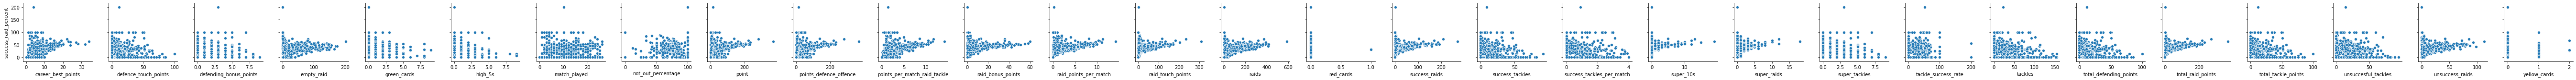

In [36]:
sns.pairplot(train_df,x_vars=columns,y_vars='success_raid_percent')
plt.show()

From above it is clear that no indepedent variable is strongly related with our dependent variable "success_raid_percent"

In [37]:
match = train_df[['name','match_played']].groupby(['name'],as_index=False).sum()

In [38]:
match

,name,match_played
0,Aashish Nagar,3
1,Abhishek Singh,15
2,Abolfazl Maghsodloumahali,41
3,Abozar Mohajermighani,45
4,Adarsh T,10
5,Adinath Sakharam Gavali,1
6,Ajay,7
7,Ajay Kumar,50
8,Ajay Thakur,102
9,Ajinkya Ashok Pawar,17


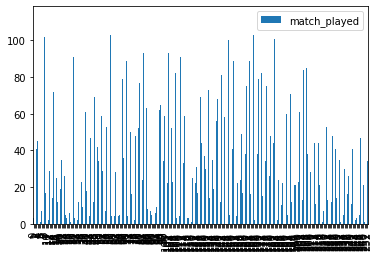

In [39]:
match.plot.bar()

In [40]:
#lets keep only those players who have played at least 20 matches in all including the all seasons
train_df = train_df.loc[train_df['match_played'] >=20]

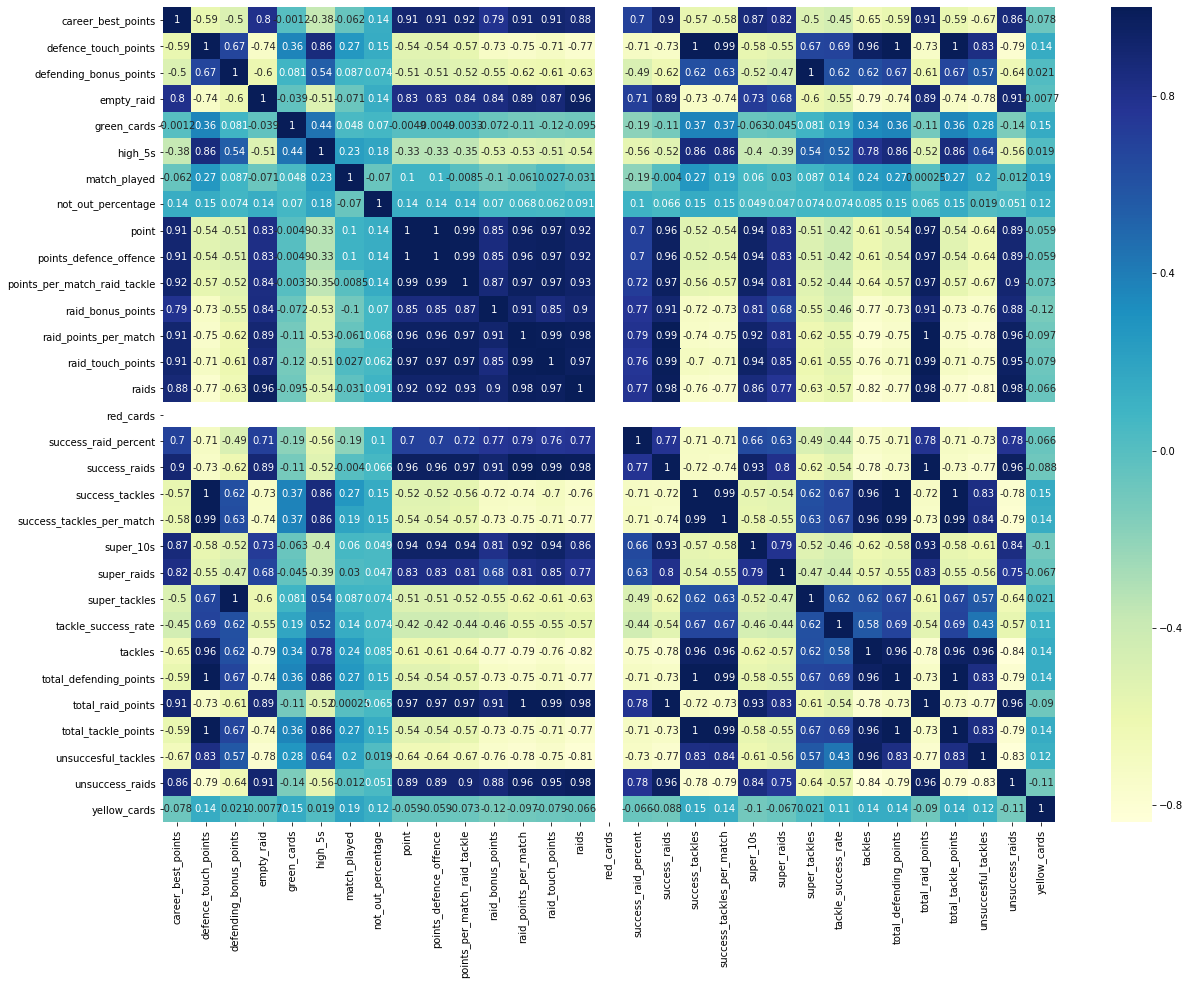

In [41]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 15))
sns.heatmap(train_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [42]:
from sklearn import model_selection
from sklearn import metrics

In [43]:
def modelfit(alg, dtrain, dtest, predictors, target,IDcol):
    #, IDcol, filename
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], y_train)
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors],(y_train) , cv=100, 
                                                scoring='neg_mean_squared_error',n_jobs=-1,verbose=-1)
    cv_score = np.sqrt(np.abs(cv_score))
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train.values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),
                                                                             np.min(cv_score),np.max(cv_score)))
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    #Export submission file:
    IDcol.append(target)
    #submission = pd.DataFrame({ x: y_test[x] for x in IDcol})
    return dtest[['name','success_raid_percent','success_raid_percent_pred']]

In [44]:
IDcol = ['name']
target = 'success_raid_percent_pred'
predictors = list(train_df.columns)
predictors.remove('success_raid_percent')
predictors.remove('name')

In [45]:
y_train=train_df['success_raid_percent']
y_test=submission_df[IDcol]
x_train=train_df[predictors]

In [46]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
preditions = modelfit(LR,train_df,submission_df,predictors,target,IDcol)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Model Report
RMSE : 12.5
CV Score : Mean - 10.51 | Std - 10.55 | Min - 0.009111 | Max - 72.69


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished


In [47]:
preditions.sort_values(by = 'success_raid_percent_pred',ascending=False).head(3)

,name,success_raid_percent,success_raid_percent_pred
1124,Victor Onyango Obiero,75.00,93.516535
641,Pawan Kumar Sehrawat,70.55,83.452387
1119,Lalit Chaudhary,18.18,79.894443


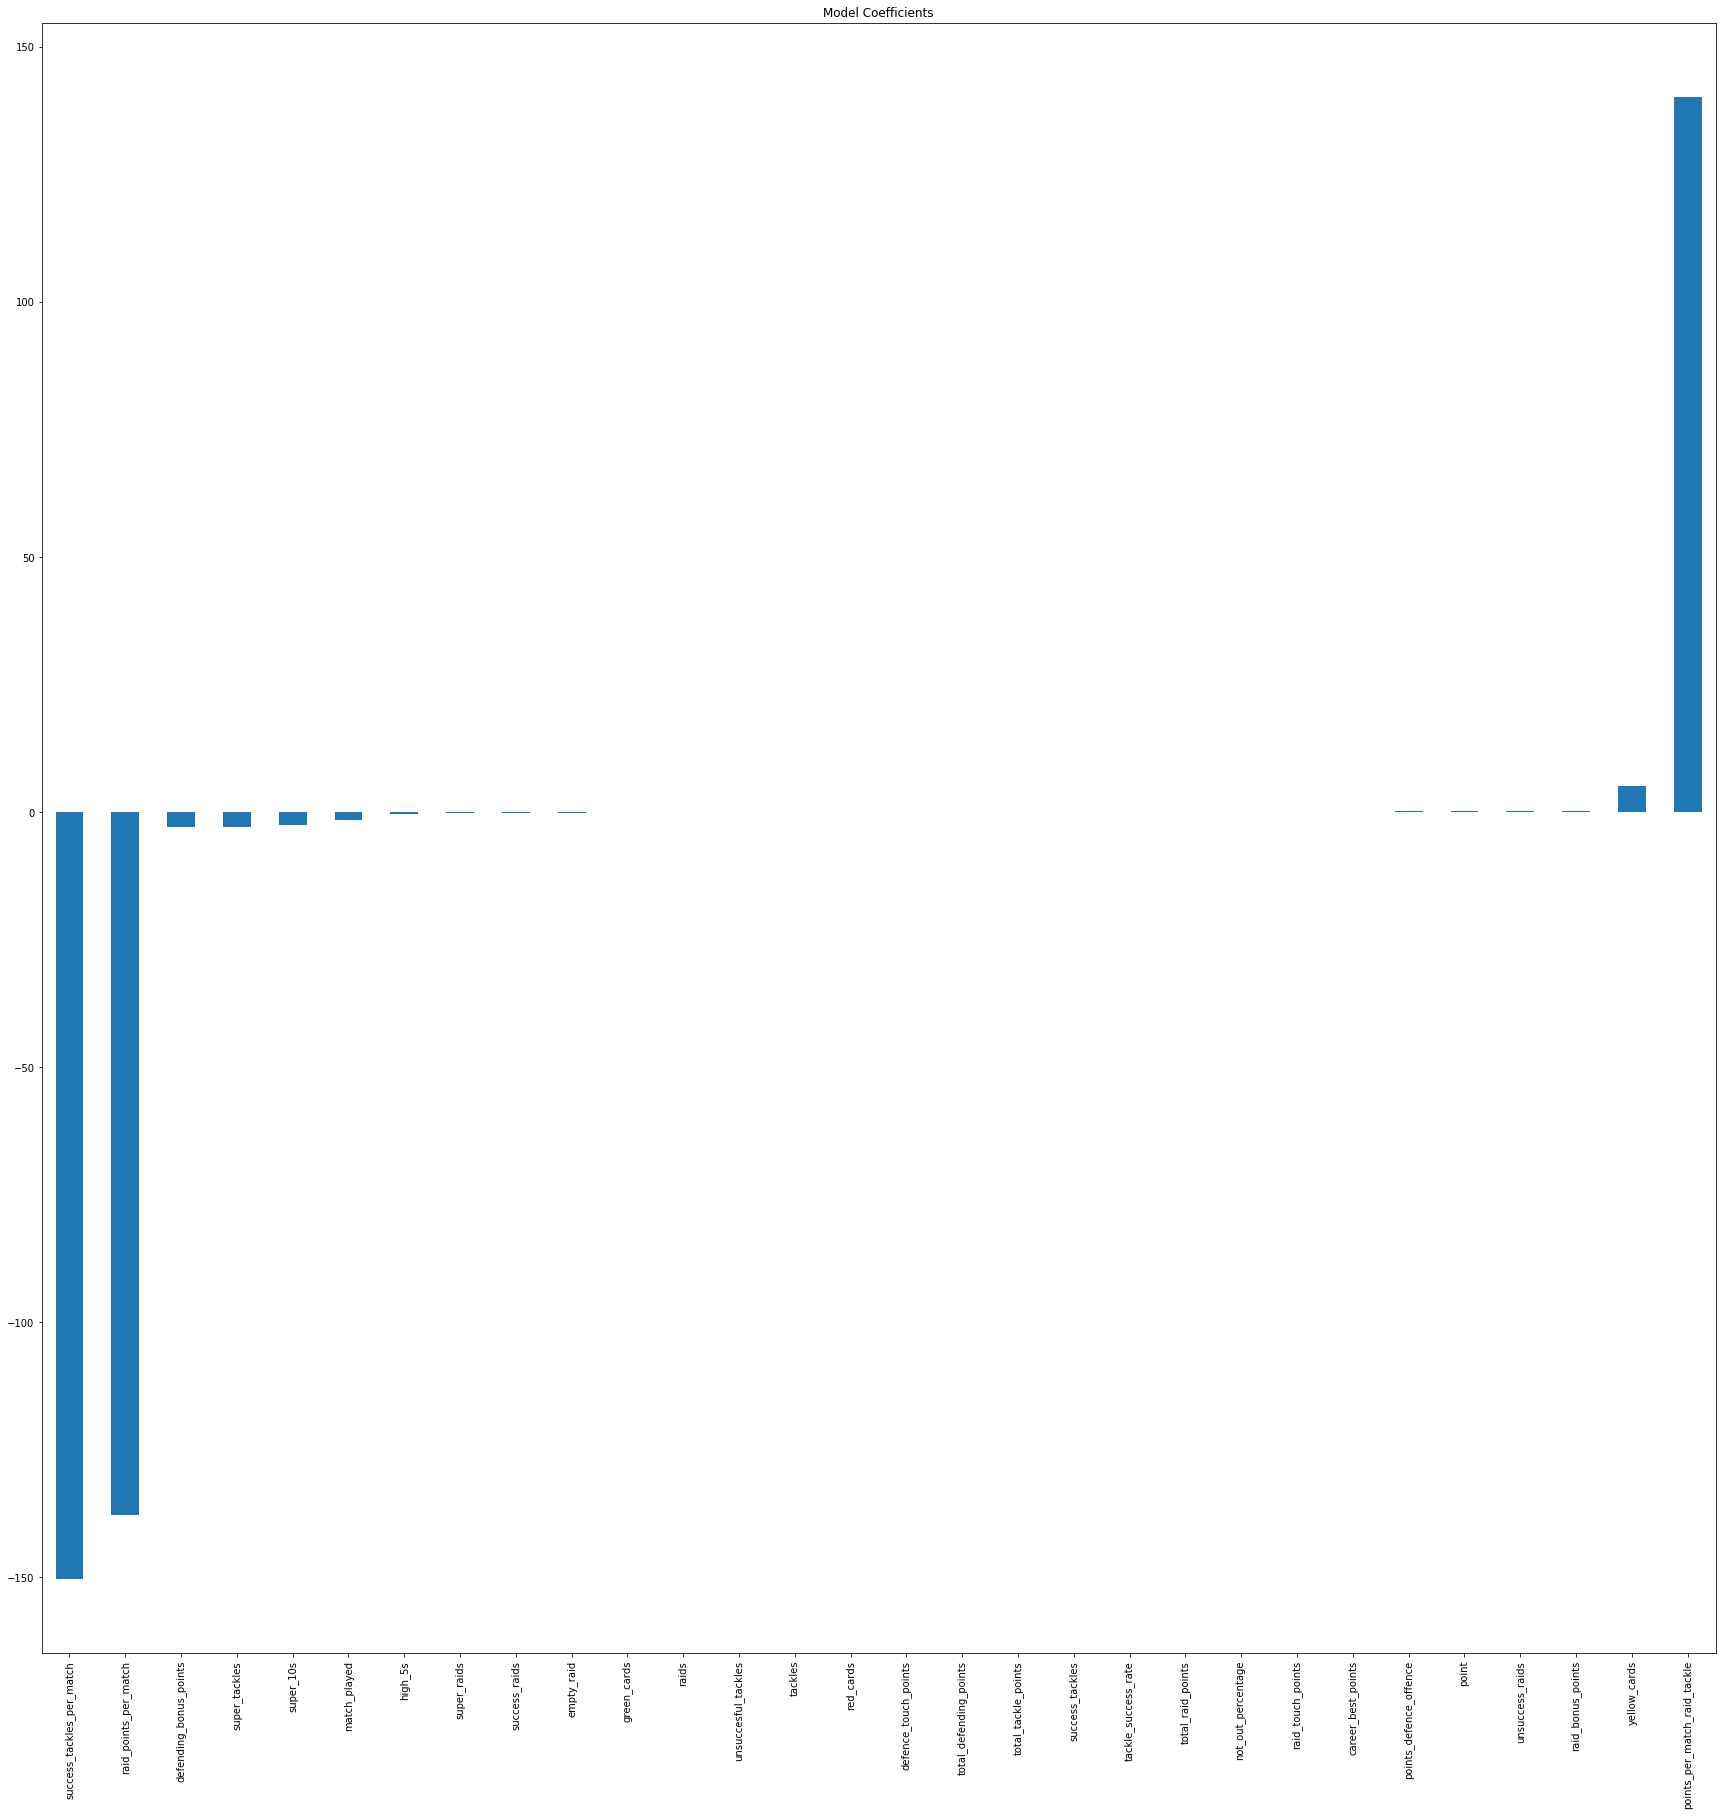

In [48]:
f, ax = plt.subplots(figsize=(30, 30))
coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [49]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
preditions = modelfit(RR,train_df,submission_df,predictors,target,IDcol)


Model Report
RMSE : 12.67
CV Score : Mean - 9.731 | Std - 10.24 | Min - 0.01894 | Max - 71.37


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [50]:
preditions.sort_values(by = 'success_raid_percent_pred',ascending=False).head(3)

,name,success_raid_percent,success_raid_percent_pred
641,Pawan Kumar Sehrawat,70.55,73.698835
1038,Siddharth Sirish Desai,63.97,70.010208
570,Pardeep Narwal,63.44,69.707261


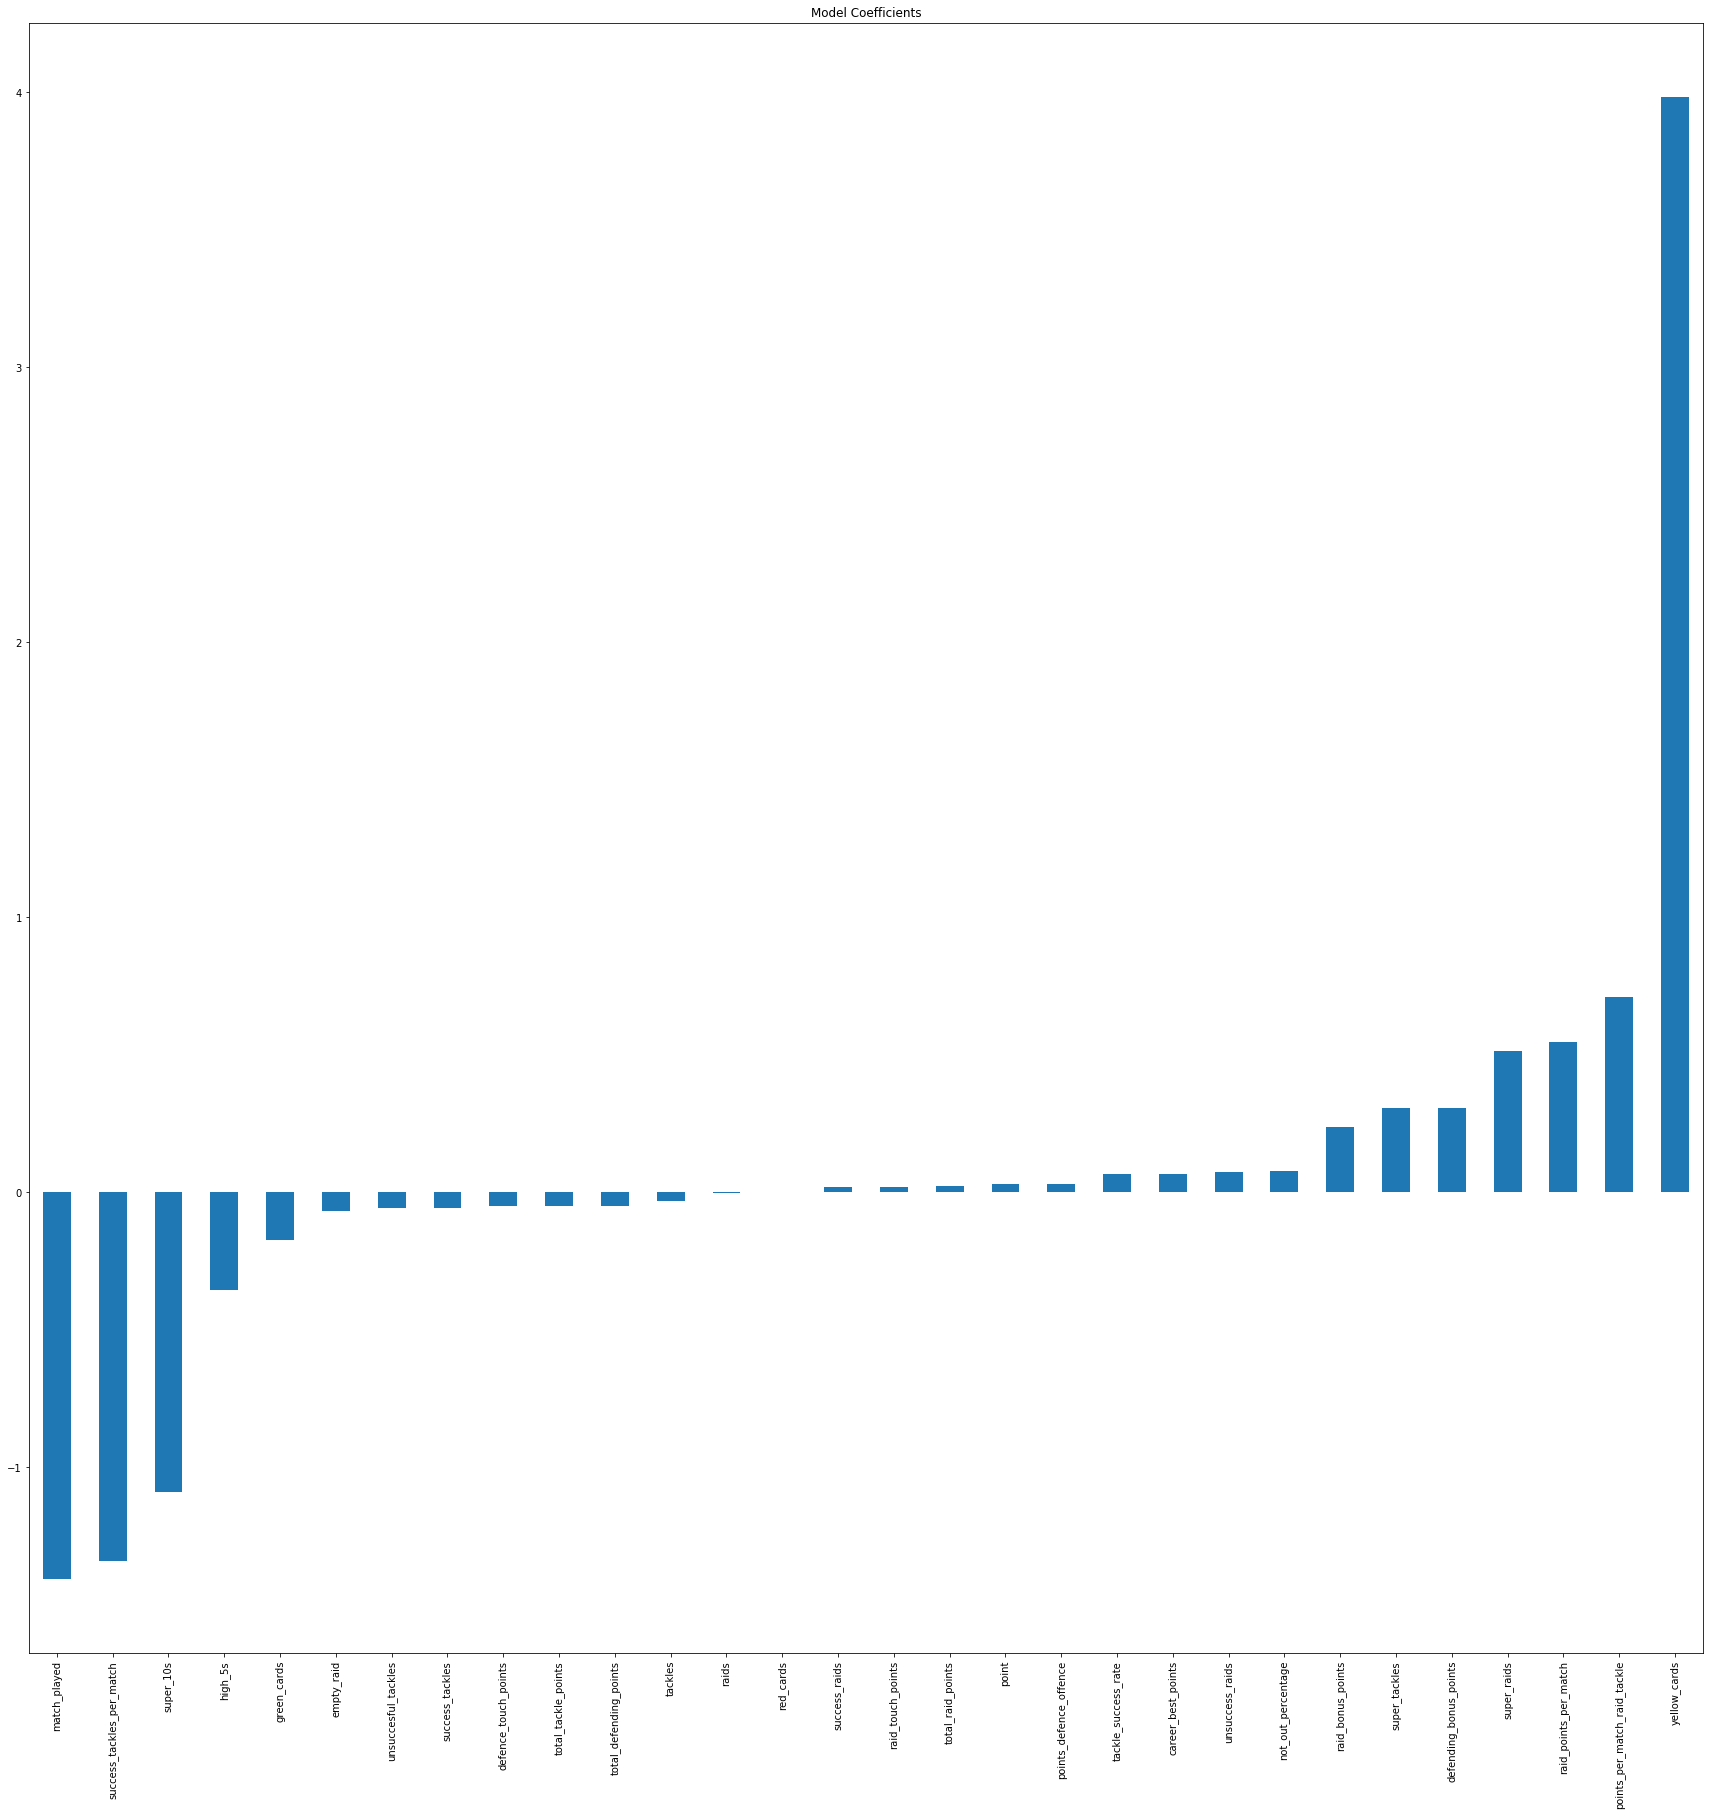

In [51]:
f, ax = plt.subplots(figsize=(30, 30))
coef1 = pd.Series(RR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [52]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.10,nthread=-1)
predictions=modelfit(my_model, train_df, submission_df, predictors, target,IDcol)

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[11:19:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   14.3s



Model Report
RMSE : 0.001154
CV Score : Mean - 4.807 | Std - 6.993 | Min - 0.04586 | Max - 44.47


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.4s finished


In [53]:
predictions.sort_values(by = 'success_raid_percent_pred',ascending=False).head(3)

,name,success_raid_percent,success_raid_percent_pred
641,Pawan Kumar Sehrawat,70.55,63.302986
570,Pardeep Narwal,63.44,62.611698
1253,Amit Kumar,62.50,60.031605


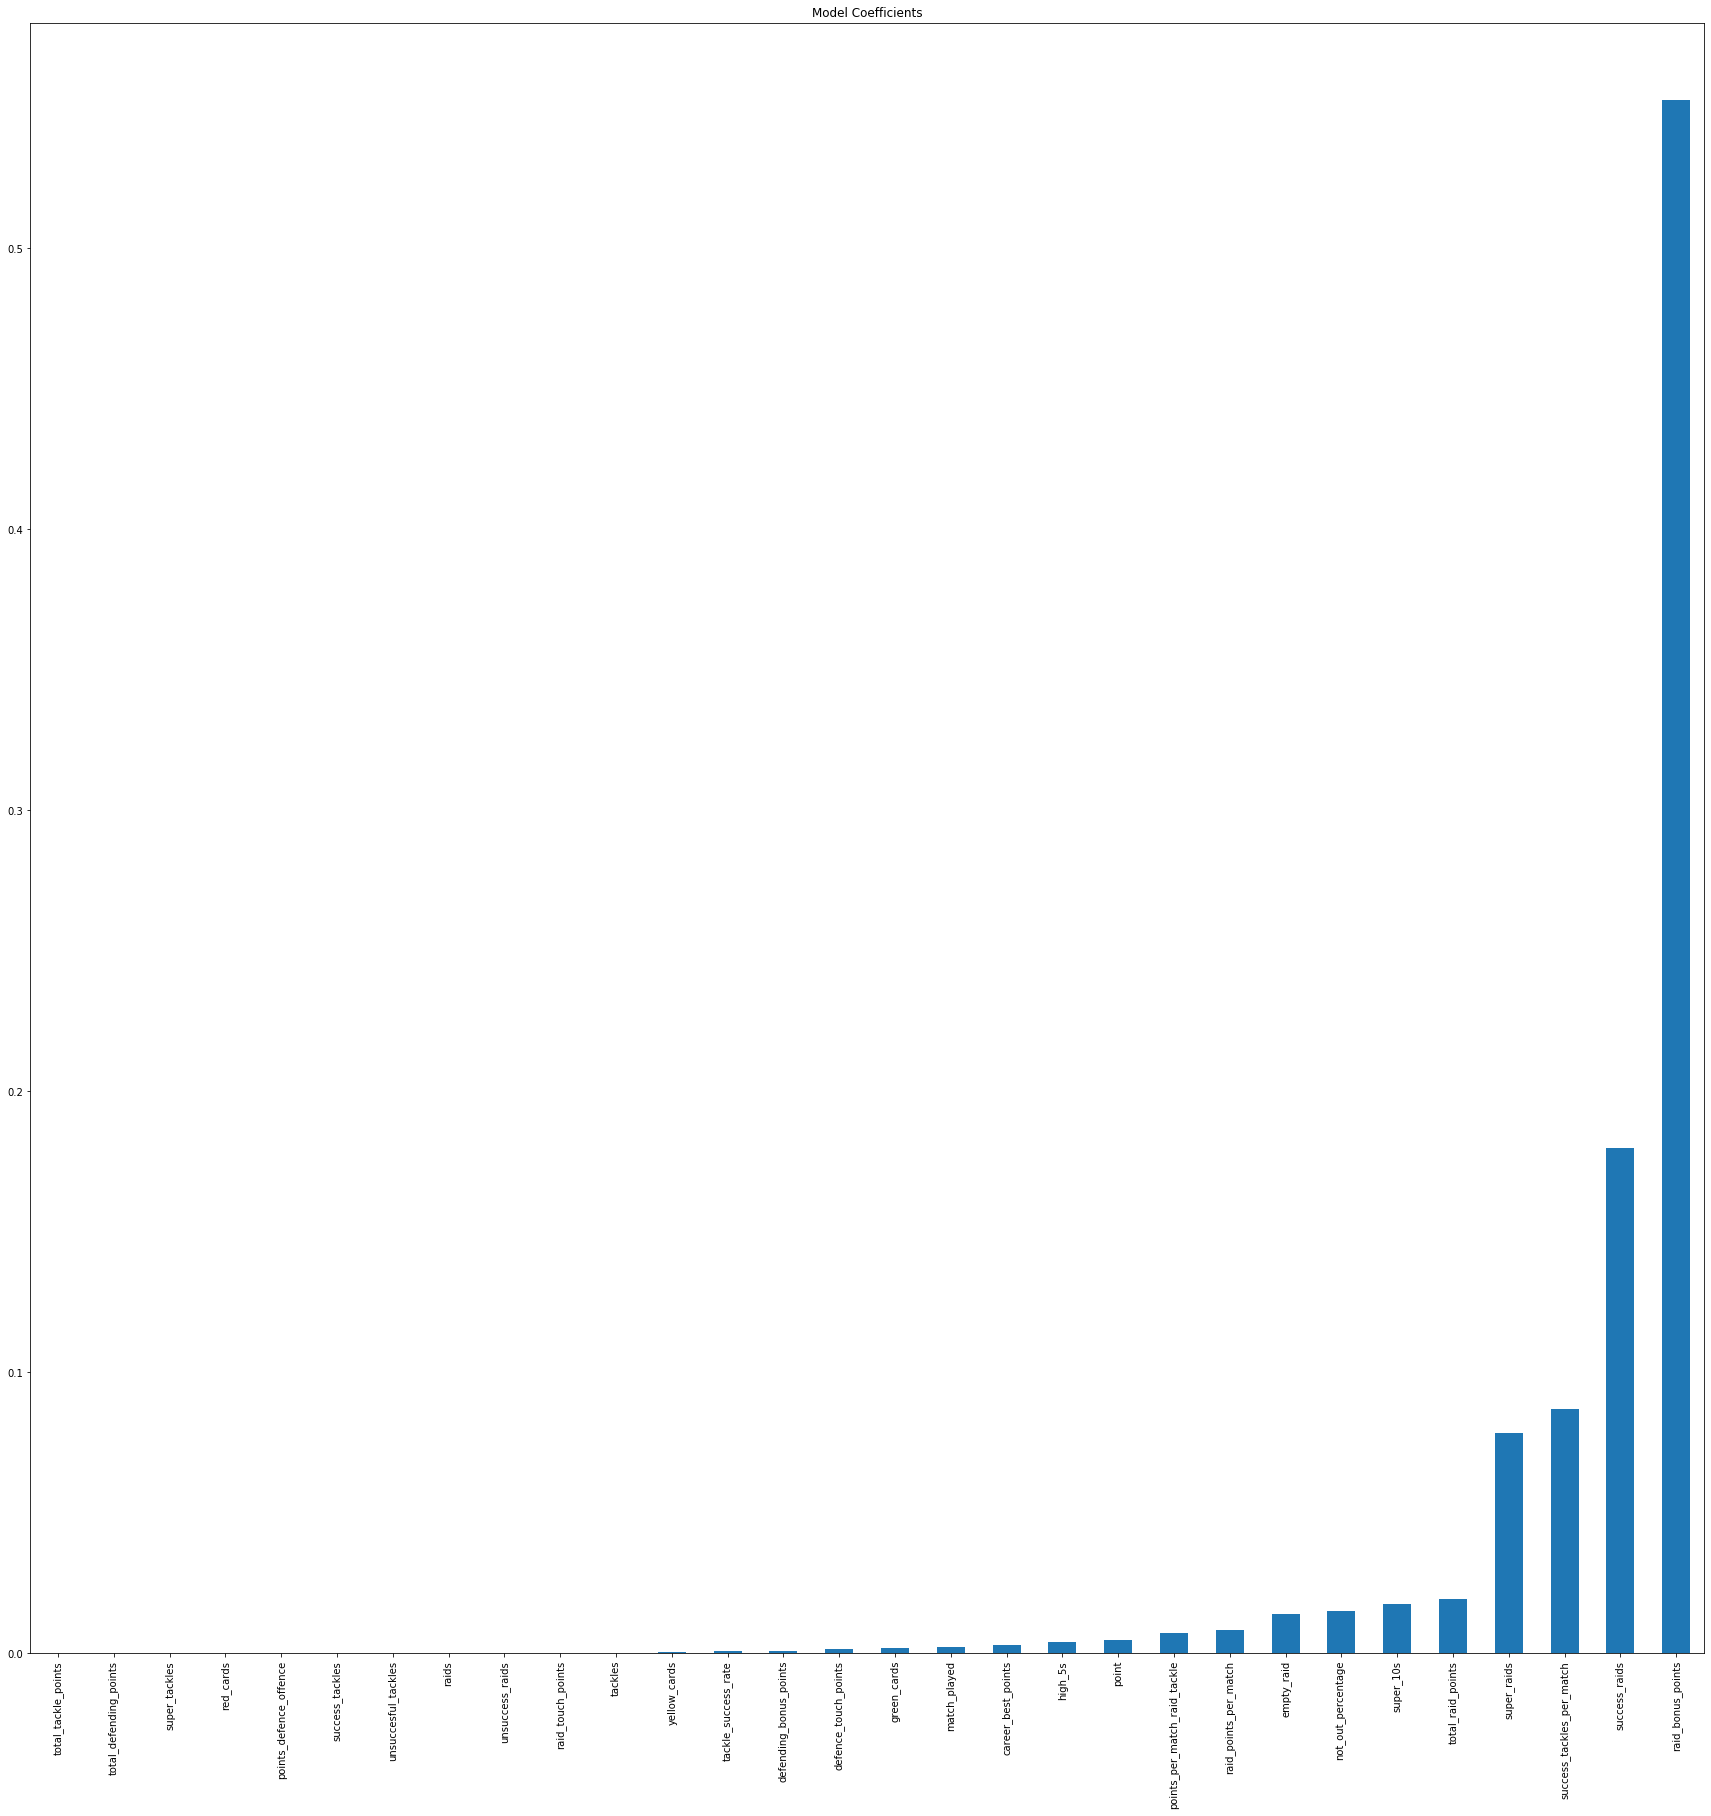

In [54]:
f, ax = plt.subplots(figsize=(30, 30))
coef1 = pd.Series(my_model.feature_importances_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

### Task 7: Predict the player with the highest SUCCESSFUL TACKLE percentage. (Max Points: 05)

In [55]:
def model_fit(alg, dtrain, dtest, predictors, target,IDcol):
    #, IDcol, filename
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], y_train)
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors],(y_train) , cv=100, 
                                                scoring='neg_mean_squared_error',n_jobs=-1)
    cv_score = np.sqrt(np.abs(cv_score))
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train.values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),
                                                                             np.min(cv_score),np.max(cv_score)))
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    #Export submission file:
    IDcol.append(target)
    #submission = pd.DataFrame({ x: y_test[x] for x in IDcol})
    return dtest[['name','tackle_success_rate','tackle_success_rate_pred']]

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
columns = list(train_df.columns)

In [58]:
columns

['career_best_points',
 'defence_touch_points',
 'defending_bonus_points',
 'empty_raid',
 'green_cards',
 'high_5s',
 'match_played',
 'name',
 'not_out_percentage',
 'point',
 'points_defence_offence',
 'points_per_match_raid_tackle',
 'raid_bonus_points',
 'raid_points_per_match',
 'raid_touch_points',
 'raids',
 'red_cards',
 'success_raid_percent',
 'success_raids',
 'success_tackles',
 'success_tackles_per_match',
 'super_10s',
 'super_raids',
 'super_tackles',
 'tackle_success_rate',
 'tackles',
 'total_defending_points',
 'total_raid_points',
 'total_tackle_points',
 'unsuccesful_tackles',
 'unsuccess_raids',
 'yellow_cards']

In [59]:
columns.remove('tackle_success_rate')
columns.remove('name')

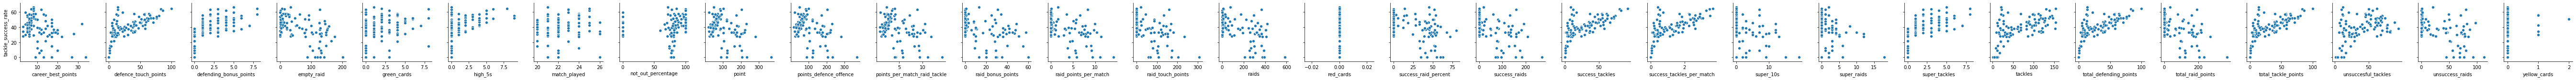

In [60]:
sns.pairplot(train_df,x_vars=columns,y_vars='tackle_success_rate')
plt.show()

In [61]:
IDcol = ['name']
target = 'tackle_success_rate_pred'
predictors = list(train_df.columns)
predictors.remove('tackle_success_rate')
predictors.remove('name')

In [62]:
y_train=train_df['tackle_success_rate']
y_test=submission_df[IDcol]
x_train=train_df[predictors]

In [63]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True,)
predictions = model_fit(LR,train_df,submission_df,predictors,target,IDcol)


Model Report
RMSE : 8.904
CV Score : Mean - 8.979 | Std - 9.524 | Min - 0.002346 | Max - 60.07


In [64]:
predictions.sort_values(by = 'tackle_success_rate_pred',ascending=False).head(3)

,name,tackle_success_rate,tackle_success_rate_pred
941,Vishal,55.40,73.211842
751,Vishal Bhardwaj,58.09,72.622455
546,Fazel Atrachali,58.76,70.446519


In [65]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.15,normalize=True)
predictions = model_fit(RR,train_df,submission_df,predictors,target,IDcol)


Model Report
RMSE : 9.669
CV Score : Mean - 7.741 | Std - 7.93 | Min - 0.05268 | Max - 33.65


In [66]:
predictions.sort_values(by = 'tackle_success_rate_pred',ascending=False).head(3)

,name,tackle_success_rate,tackle_success_rate_pred
751,Vishal Bhardwaj,58.09,61.493909
834,Nitesh Kumar,58.82,57.705048
652,Sandeep Kumar Dhull,50.37,57.702946


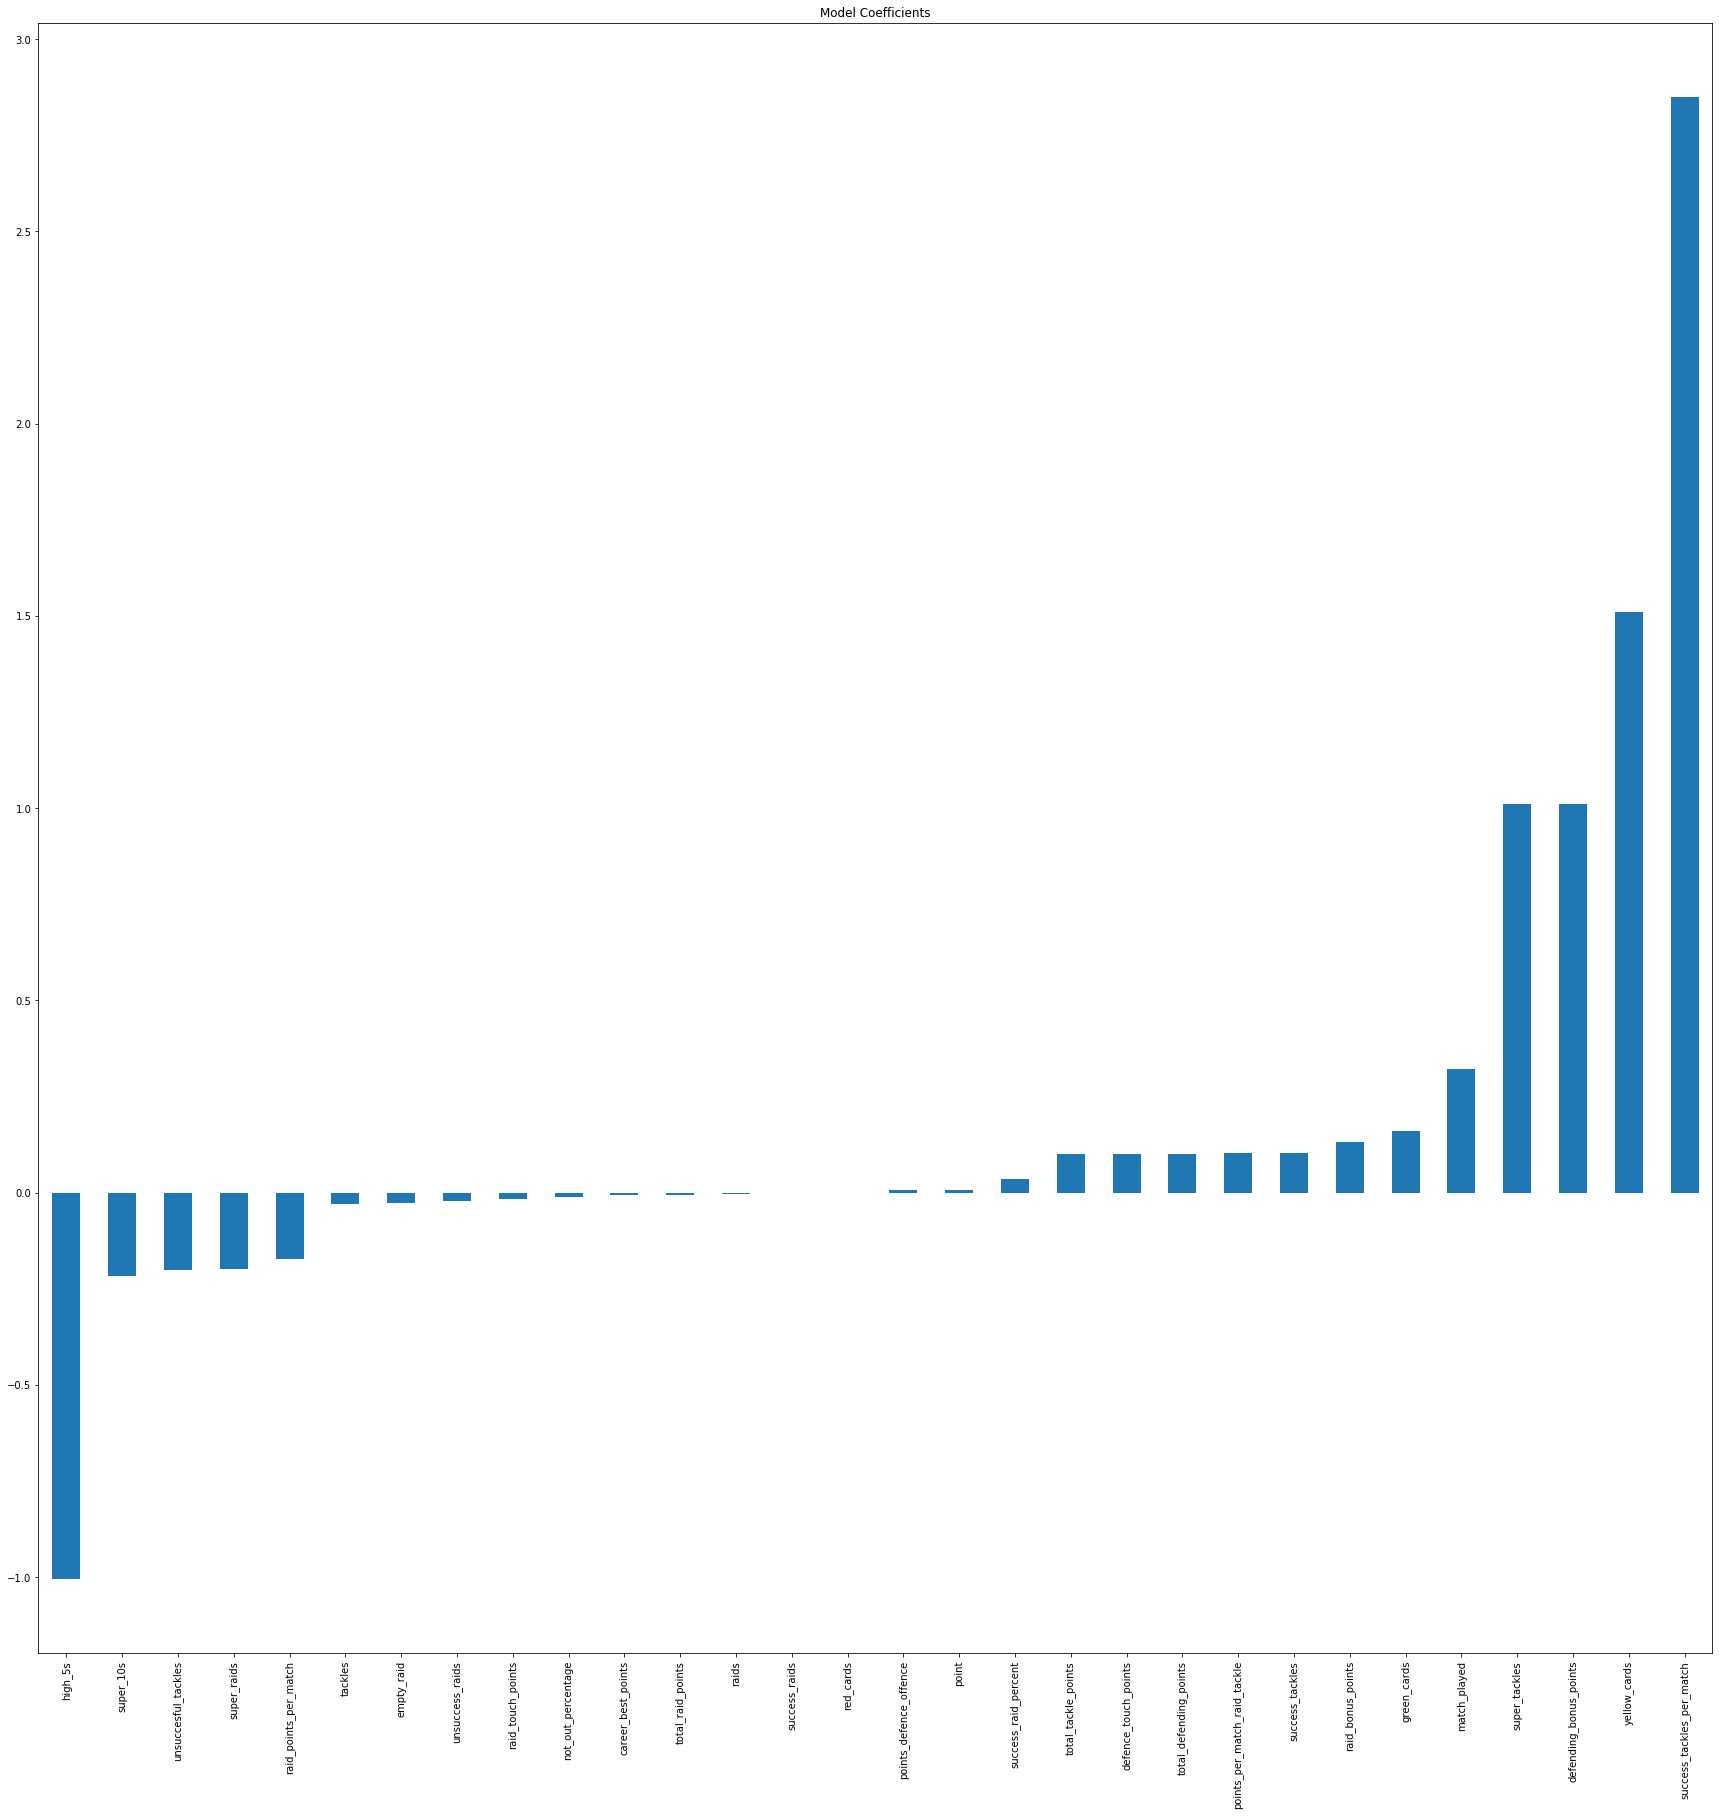

In [67]:
f, ax = plt.subplots(figsize=(30, 30))
coef1 = pd.Series(RR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [68]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.15,nthread=-1)
predictions = model_fit(my_model, train_df, submission_df, predictors, target,IDcol)

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[11:20:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Model Report
RMSE : 0.001238
CV Score : Mean - 3.611 | Std - 3.213 | Min - 0.1514 | Max - 15.66


In [69]:
predictions.sort_values(by = 'tackle_success_rate_pred',ascending=False).head(3)

,name,tackle_success_rate,tackle_success_rate_pred
1071,Baldev Singh,56.00,55.170528
546,Fazel Atrachali,58.76,55.074230
751,Vishal Bhardwaj,58.09,54.542473


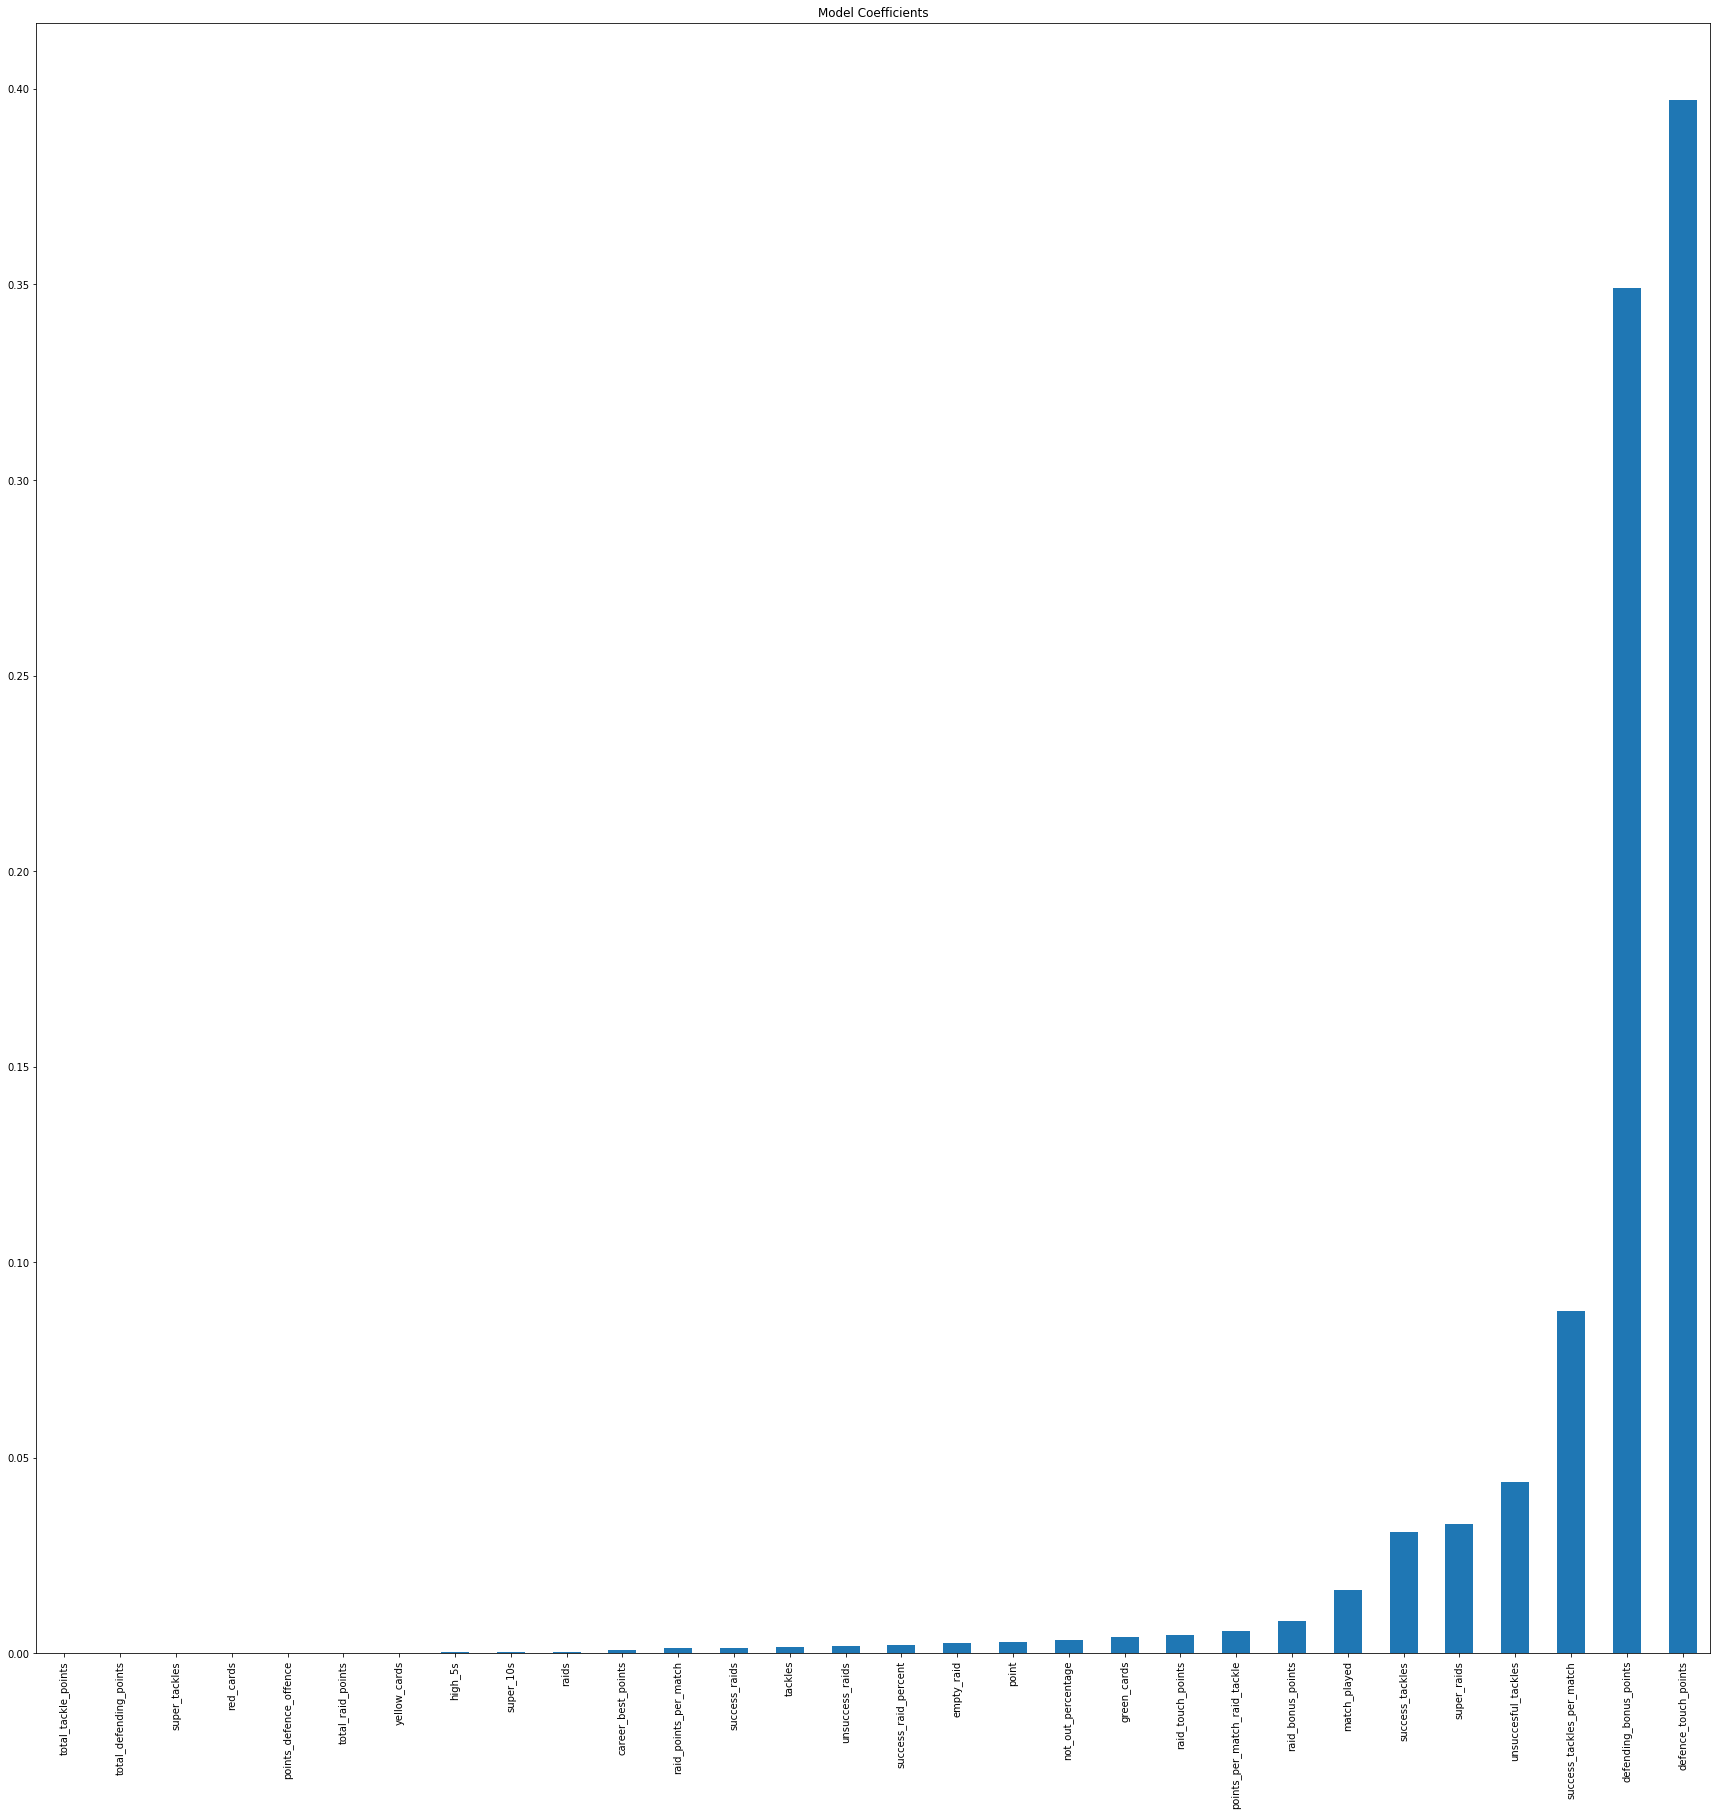

In [70]:
f, ax = plt.subplots(figsize=(30, 30))
coef1 = pd.Series(my_model.feature_importances_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')